# Stochastic GDA
## Predicting Minimum Temperature
This notebook is the second in a 3 part series of GDA (or gradient descent algorithms), and contains the code for basic Stochatic Gradient Descent Algorithm from scratch. The algorithm has been used to train the Linear Regression Model on the Weather data present with a simple hypothesis function  h(θ)=X⋅θ .

Note: This notebook can be read as a standalone and is not connected to other parts in anyway.

The important required libraries are first imported.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

Using pandas library, the file is imported into the notebook and a sample is printed to see the columns and their names.

In [32]:
df = pd.read_csv("Summary of Weather.csv")
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA
0,10001,01/07/1942,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78,72,75.0
1,10001,02/07/1942,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84,71,78.0
2,10001,03/07/1942,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79,72,76.0
3,10001,04/07/1942,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80,72,76.0
4,10001,05/07/1942,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80,71,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118536,82506,27/12/1945,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,27,0,NaN,NaN,83,65,74.0
118537,82506,28/12/1945,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,12,28,0.39,NaN,NaN,85,65,75.0
118538,82506,29/12/1945,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,12,29,0,NaN,NaN,83,65,74.0
118539,82506,30/12/1945,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,30,0,NaN,NaN,83,65,74.0


The data shown was already analyzed and cleaned before starting this notebook. A linear relationship was observed between Maximum and Minimum Temperatures as expected. Hence these 2 columns are used, with Maximum temperature as an independent variable and Minimum temperature as a dependent variable.

In [33]:
X = np.asarray(df.MAX.values)
y = np.asarray(df.MIN.values)

Now, a column of 1s is used added in the matrix of X to account for the y-intercepts in the hypothesis. It should be noted that the data is not broken into train and test datasets, since it was not in the scope of the task that was required to be done.

In [34]:
m = len(y)
X = np.vstack((np.ones(m), X.T)).T

In [35]:
X

array([[ 1., 78.],
       [ 1., 84.],
       [ 1., 79.],
       ...,
       [ 1., 83.],
       [ 1., 83.],
       [ 1., 85.]])

Using plot library for the scatter plot, to visualize the data, although it was already visualized on Excel. It is possible to normalize this data, however this is a simple problem and is not of necessity here.

Text(0, 0.5, 'MIN')

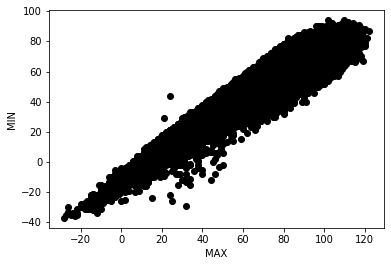

In [36]:
plt.scatter(X[:,[1]], y,  color='black') 
plt.xlabel("MAX")
plt.ylabel("MIN")

Selecting random values of theta to plot the line and see it is an example on the plot.

Text(0, 0.5, 'MIN')

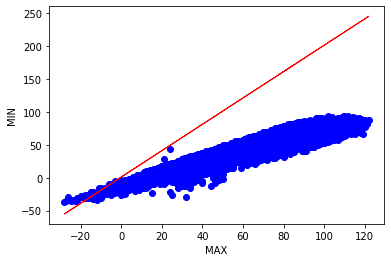

In [37]:
theta_0 = 1.0
theta_1 = 2.0

# the vector theta is initialized with theta_0 and theta_1
theta = np.asarray([theta_0,theta_1]).astype(float)

# Plot the data
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to our Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=1)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

The Mean Squared Error (MSE) cost function is defined below. Then the cost is calculated for the random theta values that were chosen above.

In [38]:
def CostFunction(X, y, theta):
  
    m = len(y) 
    J = 0 
    h = np.sum(np.multiply(X, theta), axis=1)
    
    # Calculate the Squared Error = (h - y)^2 (vectorized)
    #print(h.shape,h)
    SquaredError = np.power(np.subtract(h,y), 2)
    
    # Calculate the Cost J
    J = 1/(2*m) * np.sum(SquaredError)
    
    return J

In [39]:
CostFunction(X,y,theta)

5045.012535747126

Generating random values of theta, the cost is calculated for them. This allows for choosing the starting point with the smallest cost, so the number of iterations can be minimized.

In [40]:
import random # import the random library 

print ("[Th0 Th1]", "\tJ") # write an header

for x in range(10):
    theta_0 = random.randint(1,101)
    theta_1 = random.randint(1,101)   
    theta = np.asarray([theta_0, theta_1]).astype(float)
    # Calculate J and print the table
    print (theta, CostFunction(X, y, theta))

[Th0 Th1] 	J
[40. 13.] 545538.1789465249
[48. 87.] 25538696.810812294
[ 2. 92.] 28225466.137045413
[ 1. 93.] 28840172.218945347
[85. 33.] 3742749.6288878955
[29. 70.] 16405409.124800703
[47. 48.] 7737846.259479843
[31. 46.] 7044222.932597161
[94. 31.] 3328495.977210417
[99. 59.] 11961038.792451557


Now, the most important algorithm, Stochastic Gradient Descent is defined below, taking in all the necessary arguments.

In [42]:
def stogradientDescent(X, y, theta, alpha, num_iter):
    
    m, n = X.shape
    test_theta=theta
    for a in range(num_iter):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(m):

          # Calculate h = X * theta (vectorized Eq. 5)
          h = np.dot(X[i],test_theta)
          # Calculate the error = (h - y) (vectorized Eq. 5)
          error = np.subtract(h, y[i])
          # Calculate the new theta (vectorized Eq. 5)
          theta_new = alpha * np.dot(X[i].T, error)
          # Update theta
          test_theta = np.subtract(test_theta, theta_new)
          theta = np.subtract(theta, theta_new)

    cost = CostFunction(X,y,theta)    
    return theta, cost

Running the gradient descent with initial values -20 and 5, and for only  5  interations. Different values of the hyperparameter, alpha or the learning rate were set, but  $0.0001$  was found to be the highest at which the values converged.

In [65]:
theta = np.asarray([-20,5]).astype(float)
# Set the Learning Rate
alpha = 0.0001

#Set the number of Iterations
iterations = 5

# Run the gradientDescent() function, and collect the output
theta, cost = stogradientDescent(X, y, theta, alpha, iterations)

Plotting the new value of theta after gradient descent.

Text(0, 0.5, 'MIN')

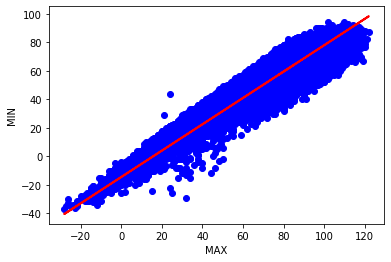

In [56]:
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to the Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=2)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

In [57]:
theta, cost

(array([-14.48992884,   0.92397391]), 33.0819972030999)

From the graph, it can be seen that the line lies on the scatter plot. Also the cost function has been minimized compared to before. It might be possible to reduce it further, so now gradient descent will be done for a second time with increased number of iterations.

In [76]:
theta = np.asarray([-20,5]).astype(float)
# Set the Learning Rate
alpha = 0.0001

#Set the number of Iterations
iterations = 15

# Run the gradientDescent() function, and collect the output
theta, cost = stogradientDescent(X, y, theta, alpha, iterations)

Text(0, 0.5, 'MIN')

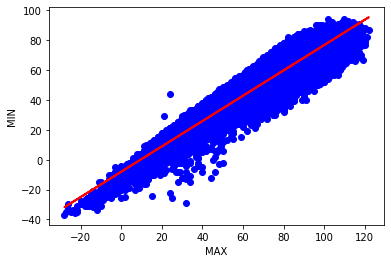

In [77]:
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to the Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=2)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

In [78]:
theta, cost

(array([-8.07435477,  0.84803078]), 31.494437107438674)

By changing increasing the number of iterations by 3 fold, it is observed that there is no significant change in the cost and only some change in the weights. This is  due to the fact that the there is alot of noise in the simple stochastic gradient descent. Hence, the use of mini batch is encourged which is between the basic batch and the basic stochastic gradient descent. It should also be noted that this algorithm was much faster than the basic gradient descent.

# Conclusion
Stochastic Gradient descent is faster than the basic Batch gradient descent but it lacks accuracy. However, for a simple model such as this one, it is possible to use this and get a sufficiently good model to predict values. However, different models with different number of iterations will have to be seen to choose the best one.